

<br>
<font>

<div dir=ltr align=center>

<br>
<font color=900C3F size=10>
Machine Learning In Neuroimaging <br>

<br>
<font color=FF5733 size=6 dir=ltr align=center>
Session 3: Practical: Regression, preprocessing data  p2<br>

<font color=D00000 size=5>

<br>
Winter 2025

<font color=FFC300 size=6>
<br>
Fatemeh Jamshidian
    <!-- <br> -->



In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score


In [56]:

abide = pd.read_csv('abide2.tsv', sep='\t')


In [59]:
abide.insert(6, 'temp', abide['age_resid'])
abide.drop('age_resid', axis=1, inplace=True)
abide.rename(columns={'temp': 'age_resid'}, inplace=True)


In [61]:
abide

,site,subject,age,sex,group,age_resid,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,2.0,1.0,13.642852,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,2.0,1.0,16.081732,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,1.0,2.0,12.866264,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,1.0,1.0,13.698139,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,2.0,2.0,14.772459,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,ABIDEII-IU_1,29570,20.000000,1.0,2.0,10.644232,3321.0,290.0,381.0,2802.0,...,2.553,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265
1000,ABIDEII-NYU_1,29233,10.862000,1.0,2.0,16.260139,2860.0,162.0,456.0,2460.0,...,2.437,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086
1001,ABIDEII-SDSU_1,28862,11.200000,1.0,2.0,13.211420,3377.0,177.0,497.0,2810.0,...,2.770,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292
1002,ABIDEII-KKI_1,29312,9.789041,2.0,2.0,14.538742,3322.0,297.0,426.0,2640.0,...,2.579,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114


In [62]:
abide.describe()

,subject,age,sex,group,age_resid,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,29278.616534,15.101264,1.238048,1.538845,15.102124,3161.415339,226.266932,395.445219,2613.914343,1747.64741,...,2.543007,3.256986,2.677017,2.721997,3.173171,2.809079,3.051686,2.691974,2.867733,3.200925
std,374.424343,9.433702,0.426101,0.498737,5.363841,495.962723,68.517782,67.150610,343.635256,235.02218,...,0.346484,0.470978,0.317000,0.337975,0.323499,0.330795,0.375022,0.322569,0.351564,0.394258
min,28675.000000,5.128000,1.000000,1.000000,-5.390924,1423.000000,80.000000,166.000000,981.000000,791.00000,...,1.633000,1.682000,1.563000,1.652000,1.935000,1.399000,1.599000,1.647000,1.790000,1.138000
25%,28974.750000,9.280137,1.000000,1.000000,13.215053,2846.750000,172.000000,352.000000,2433.000000,1603.00000,...,2.309750,3.004000,2.487500,2.507000,2.987750,2.601250,2.835750,2.490000,2.640000,2.957500
50%,29247.500000,11.667580,1.000000,2.000000,14.909247,3136.500000,225.000000,396.500000,2619.000000,1746.50000,...,2.525500,3.357500,2.693500,2.724000,3.206000,2.852500,3.085500,2.709000,2.883500,3.221000
75%,29542.250000,18.015000,1.000000,2.000000,16.620996,3454.250000,275.000000,438.250000,2822.000000,1900.25000,...,2.784500,3.594250,2.883000,2.953250,3.389250,3.027250,3.313000,2.895000,3.097500,3.458000
max,30167.000000,64.000000,2.000000,2.000000,44.644232,4740.000000,494.000000,641.000000,3588.000000,2477.00000,...,3.448000,4.219000,3.735000,3.795000,4.136000,3.630000,4.083000,3.990000,3.961000,4.328000


In [64]:
 abide.isnull().sum().sum()

0

In [65]:
features = abide.filter(like='fs')


In [68]:
features

,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,fsArea_L_FEF_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,632.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,302.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,1374.0,456.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,407.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,985.0,315.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3321.0,290.0,381.0,2802.0,1827.0,1314.0,184.0,1992.0,1668.0,579.0,...,2.553,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265
1000,2860.0,162.0,456.0,2460.0,1718.0,1225.0,240.0,2459.0,1721.0,574.0,...,2.437,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086
1001,3377.0,177.0,497.0,2810.0,1866.0,1343.0,254.0,1758.0,1318.0,436.0,...,2.770,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292
1002,3322.0,297.0,426.0,2640.0,1726.0,1242.0,318.0,1719.0,1310.0,444.0,...,2.579,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114


In [71]:
phenotypes = abide.iloc[:, :6]


In [73]:
phenotypes

,site,subject,age,sex,group,age_resid
0,ABIDEII-KKI_1,29293,8.893151,2.0,1.0,13.642852
1,ABIDEII-OHSU_1,28997,12.000000,2.0,1.0,16.081732
2,ABIDEII-GU_1,28845,8.390000,1.0,2.0,12.866264
3,ABIDEII-NYU_1,29210,8.300000,1.0,1.0,13.698139
4,ABIDEII-EMC_1,29894,7.772758,2.0,2.0,14.772459
...,...,...,...,...,...,...
999,ABIDEII-IU_1,29570,20.000000,1.0,2.0,10.644232
1000,ABIDEII-NYU_1,29233,10.862000,1.0,2.0,16.260139
1001,ABIDEII-SDSU_1,28862,11.200000,1.0,2.0,13.211420
1002,ABIDEII-KKI_1,29312,9.789041,2.0,2.0,14.538742


In [75]:
y = phenotypes['age']

In [22]:
y

0        8.893151
1       12.000000
2        8.390000
3        8.300000
4        7.772758
          ...    
999     20.000000
1000    10.862000
1001    11.200000
1002     9.789041
1003     6.194000
Name: age, Length: 1004, dtype: float64

In [28]:
n_features = 5
X = features.sample(n_features, axis=1, random_state=6)

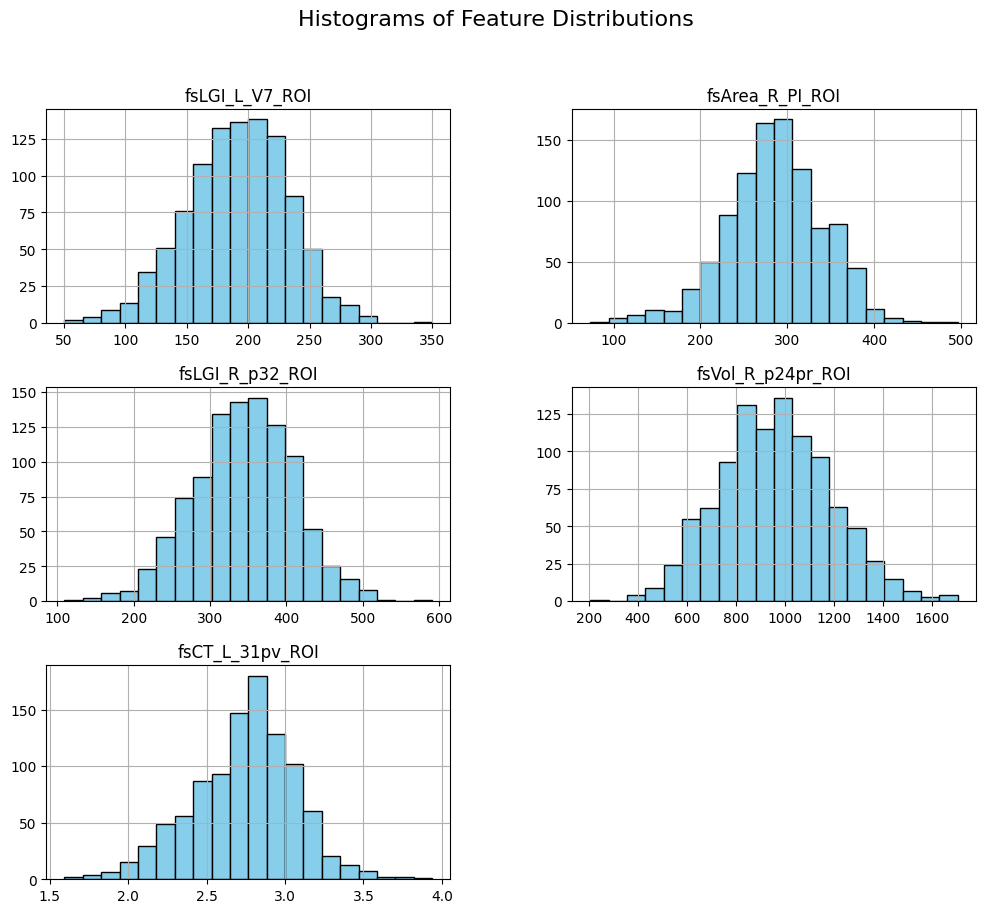

In [30]:
X.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.show()

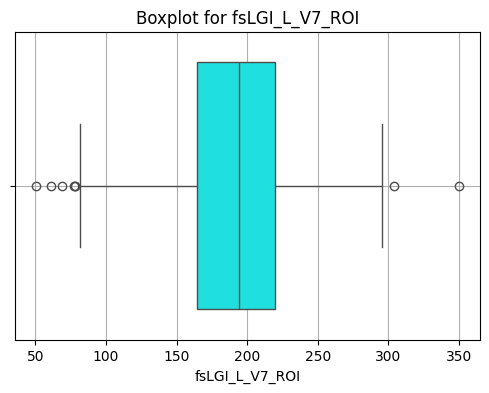

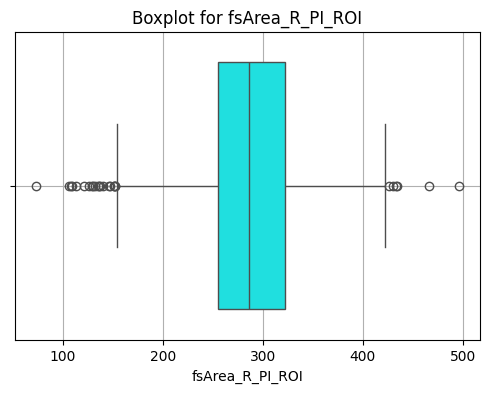

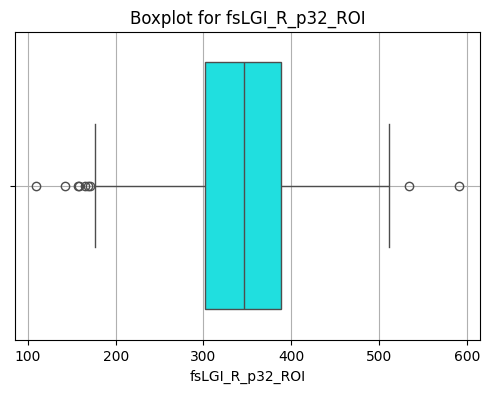

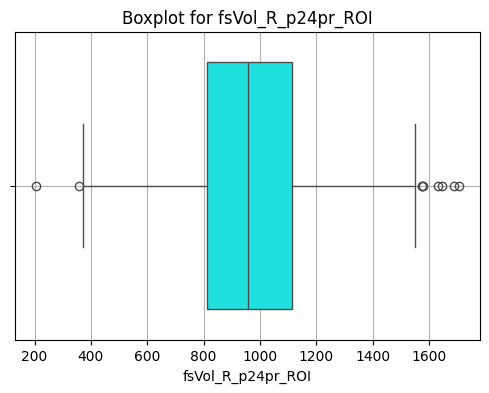

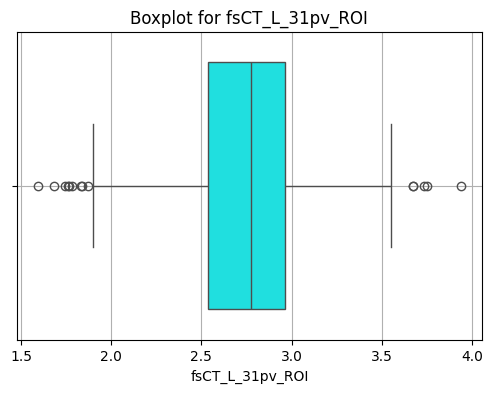

In [32]:
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X[feature], color='cyan')
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()


In [34]:
all = pd.concat([X,y], axis = 1)
all

,fsLGI_L_V7_ROI,fsArea_R_PI_ROI,fsLGI_R_p32_ROI,fsVol_R_p24pr_ROI,fsCT_L_31pv_ROI,age
0,151.38,267.0,308.68,1100.0,2.800,8.893151
1,113.54,265.0,314.49,859.0,2.569,12.000000
2,217.73,299.0,388.57,1201.0,2.911,8.390000
3,213.92,294.0,370.09,895.0,3.045,8.300000
4,171.08,163.0,310.63,1151.0,3.083,7.772758
...,...,...,...,...,...,...
999,221.99,329.0,378.21,976.0,2.291,20.000000
1000,231.92,369.0,332.24,879.0,2.851,10.862000
1001,229.30,268.0,324.22,688.0,2.750,11.200000
1002,184.72,287.0,419.22,852.0,2.993,9.789041


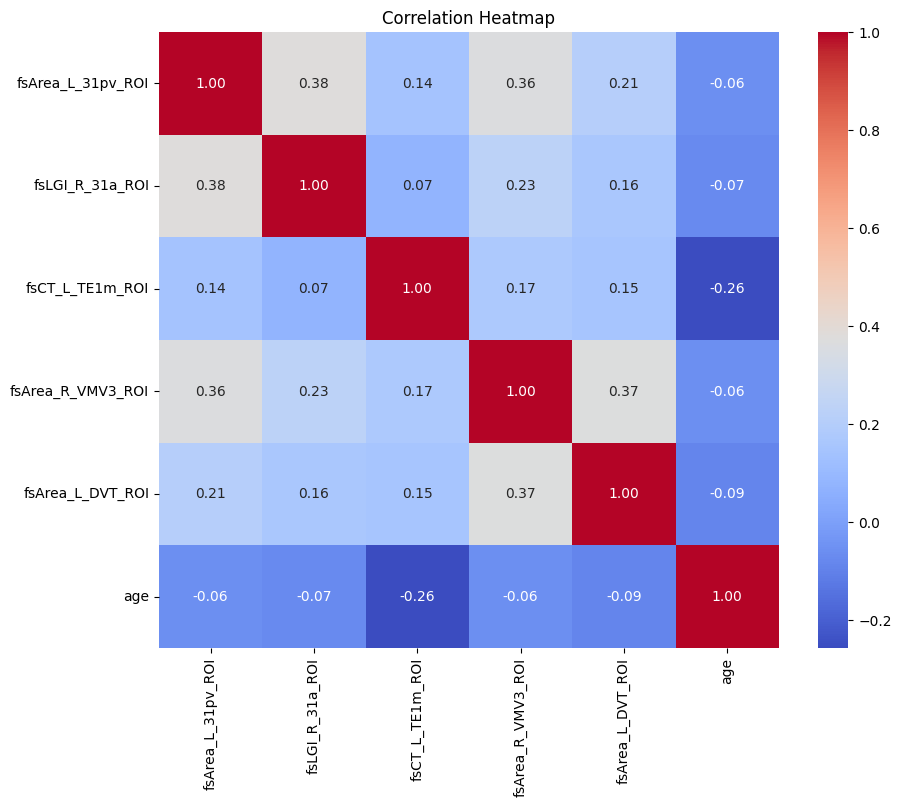

In [98]:
correlation_matrix = all.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [100]:
correlation_matrix

,fsArea_L_31pv_ROI,fsLGI_R_31a_ROI,fsCT_L_TE1m_ROI,fsArea_R_VMV3_ROI,fsArea_L_DVT_ROI,age
fsArea_L_31pv_ROI,1.000000,0.376261,0.143402,0.362820,0.207541,-0.059566
fsLGI_R_31a_ROI,0.376261,1.000000,0.073870,0.232418,0.160363,-0.072727
fsCT_L_TE1m_ROI,0.143402,0.073870,1.000000,0.174401,0.153615,-0.257646
fsArea_R_VMV3_ROI,0.362820,0.232418,0.174401,1.000000,0.368559,-0.060287
fsArea_L_DVT_ROI,0.207541,0.160363,0.153615,0.368559,1.000000,-0.089503
age,-0.059566,-0.072727,-0.257646,-0.060287,-0.089503,1.000000


In [102]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
df_reduced = selector.fit_transform(X)

In [104]:
df_reduced

array([[284.   , 196.6  ,   3.525, 193.   , 366.   ],
       [179.   , 129.03 ,   3.688, 213.   , 442.   ],
       [299.   , 158.08 ,   3.187, 268.   , 418.   ],
       ...,
       [218.   , 155.16 ,   2.573, 213.   , 502.   ],
       [248.   , 207.64 ,   2.75 , 248.   , 486.   ],
       [269.   , 148.46 ,   3.414, 187.   , 287.   ]])

In [40]:
model = LinearRegression()
model.fit(X, y)
print("Estimated intercept:", model.intercept_)
print("Estimated coefficients:", model.coef_.round(2))
print(f'r2 = {model.score(X,y)}')

Estimated intercept: 45.51183670960624
Estimated coefficients: [-0.    0.    0.02 -0.01 -9.42]
r2 = 0.20765075190235227


In [50]:
z_scores = np.abs(zscore(all))
outliers = (z_scores > 3)
all = all[~np.any(outliers, axis=1)]


In [52]:
scaler = StandardScaler()

X1 = scaler.fit_transform(all.iloc[:, :-1])
y = all.iloc[:, -1] 

In [54]:
model = LinearRegression()
model.fit(X1, y)
print("Estimated intercept:", model.intercept_)
print("Estimated coefficients:", model.coef_.round(2))
print(f'r2 = {model.score(X1,y)}')

Estimated intercept: 13.949555393993688
Estimated coefficients: [-0.09  0.1   1.05 -1.43 -3.13]
r2 = 0.2955483782637225


In [79]:
X = features

In [81]:
all = pd.concat([X,y], axis = 1)
all

,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,fsArea_L_FEF_ROI,...,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI,age
0,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,632.0,...,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179,8.893151
1,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,302.0,...,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324,12.000000
2,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,1374.0,456.0,...,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232,8.390000
3,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,407.0,...,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264,8.300000
4,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,985.0,315.0,...,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128,7.772758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3321.0,290.0,381.0,2802.0,1827.0,1314.0,184.0,1992.0,1668.0,579.0,...,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265,20.000000
1000,2860.0,162.0,456.0,2460.0,1718.0,1225.0,240.0,2459.0,1721.0,574.0,...,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086,10.862000
1001,3377.0,177.0,497.0,2810.0,1866.0,1343.0,254.0,1758.0,1318.0,436.0,...,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292,11.200000
1002,3322.0,297.0,426.0,2640.0,1726.0,1242.0,318.0,1719.0,1310.0,444.0,...,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114,9.789041


In [83]:
z_scores = np.abs(zscore(all))
outliers = (z_scores > 3)
all = all[~np.any(outliers, axis=1)]


In [89]:
correlation_matrix = all.corr()

In [91]:
correlation_matrix.shape

(1441, 1441)

In [95]:
age_corr = correlation_matrix.iloc[:-1, -1]

In [143]:
new_features = age_corr[age_corr > 0.4].index

In [145]:
new_features

Index(['fsArea_R_H_ROI', 'fsLGI_R_H_ROI'], dtype='object')

In [147]:
X = all[new_features]
X

,fsArea_R_H_ROI,fsLGI_R_H_ROI
1,417.0,416.57
3,363.0,363.48
4,369.0,369.46
6,387.0,387.30
8,383.0,382.89
...,...,...
991,295.0,294.98
992,356.0,356.37
994,395.0,394.77
999,392.0,392.12


In [149]:
scaler = StandardScaler()

X1 = scaler.fit_transform(X)
y = all.iloc[:, -1] 

In [151]:
model = LinearRegression()
model.fit(X1, y)
print("Estimated intercept:", model.intercept_)
print("Estimated coefficients:", model.coef_.round(2))
print(f'r2 = {model.score(X1,y)}')

Estimated intercept: 15.133394513356194
Estimated coefficients: [-48.47  51.53]
r2 = 0.16620225974720637


<Axes: xlabel='age'>

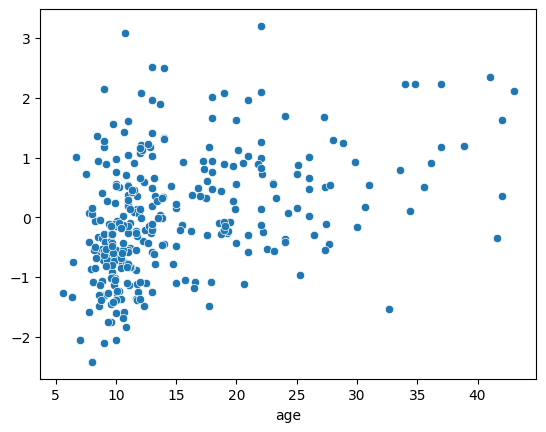

In [171]:
sns.scatterplot(x = y, y = X1[:, 1])

In [179]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X1)

In [181]:
X_poly.shape

(306, 6)

$X_1$ fsArea_R_H_ROI
	
$X_2$ fsLGI_R_H_ROI

X1, X2, X1^2, X2^2, X1.X2, 1

In [184]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
print("Estimated intercept:", model_poly.intercept_)
print("Estimated coefficients:", model_poly.coef_.round(2))
print(f'r2 = {model_poly.score(X_poly,y)}')

Estimated intercept: 14.345173337904884
Estimated coefficients: [ 0.000000e+00 -2.505000e+01  2.807000e+01  2.415883e+04 -4.835796e+04
  2.419901e+04]
r2 = 0.17792202387751022


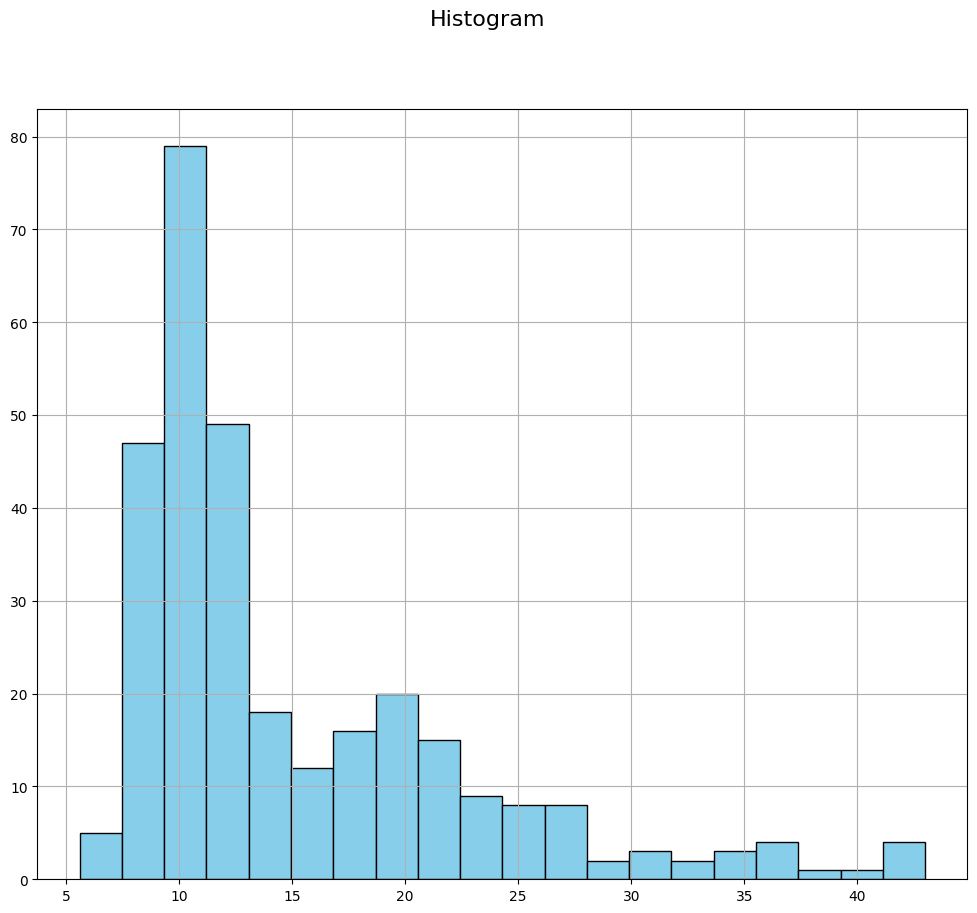

In [189]:
y.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram", fontsize=16)
plt.show()

In [191]:
y_transformed = np.log(y)

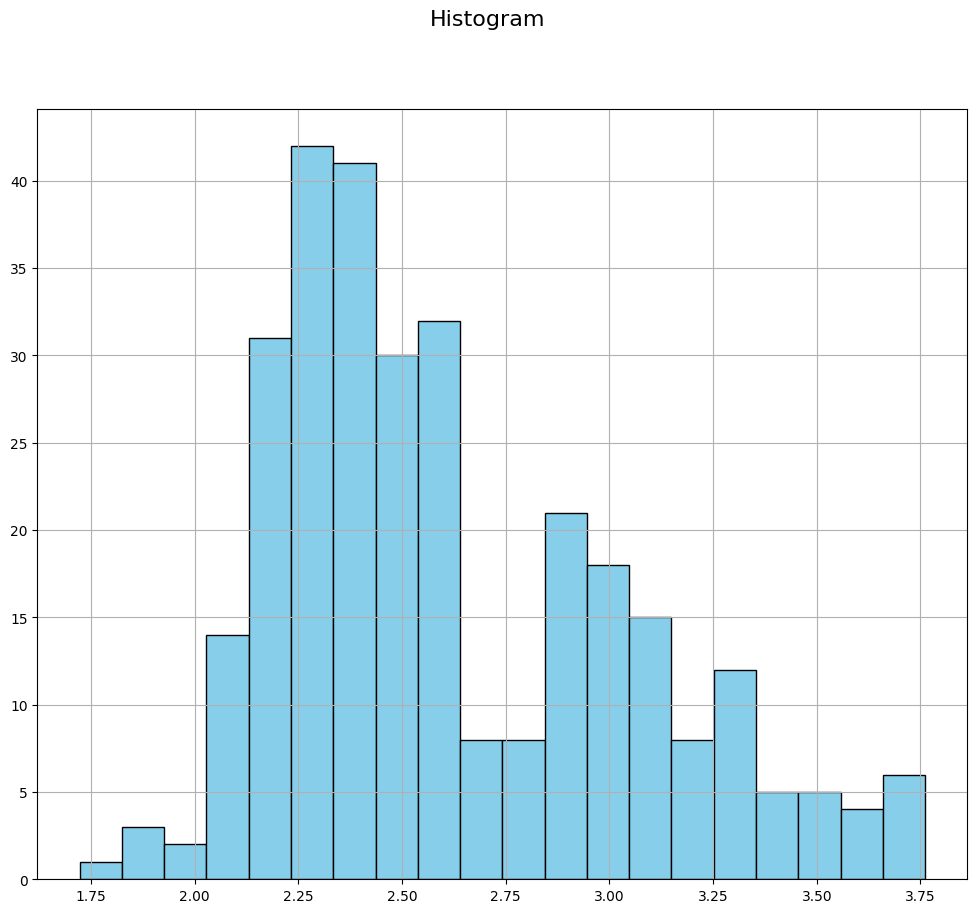

In [193]:
y_transformed.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram", fontsize=16)
plt.show()

In [195]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y_transformed)
print("Estimated intercept:", model_poly.intercept_)
print("Estimated coefficients:", model_poly.coef_.round(2))
print(f'r2 = {model_poly.score(X_poly,y_transformed)}')

Estimated intercept: 2.589438976971731
Estimated coefficients: [ 0.00000e+00 -5.20000e-01  7.00000e-01  1.33725e+03 -2.67514e+03
  1.33788e+03]
r2 = 0.19694364034693002


In [197]:
y_pred = model_poly.predict(X_poly)


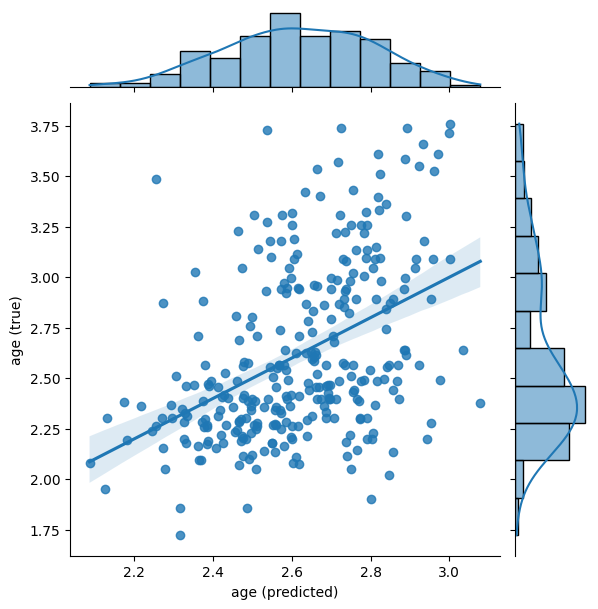

In [199]:

g = sns.jointplot(x=y_pred, y=y_transformed, kind="reg").set_axis_labels("age (predicted)", "age (true)")